# Vellore Institute of Technology

# School of Computer Science and Engineering

# M.tech Data Science

# Name: R Hariprasath

# Reg.no: 20MID0197

# Campus : Vellore

# Date: 05-06-2023


# Smart Bridge internship training

# ADS Assignment -1

## 1. Download the dataset: Dataset

## 2. Load the dataset into the tool.

In [1]:
# importing appropriate packages
import pandas as pd
import numpy as np

In [2]:
house=pd.read_csv('Housing.csv')

In [3]:
house

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


## 3. Perform Below Visualizations.

In [4]:
# importing the required package
import matplotlib.pyplot as plt

### Univariate Analysis

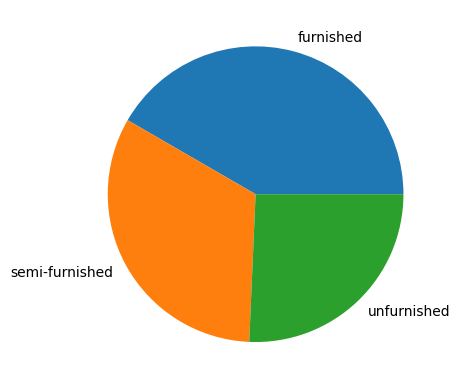

In [5]:
#PIE chart
q3a=house['furnishingstatus'].value_counts()
label=['furnished','semi-furnished','unfurnished']
q3a
plt.pie(q3a,labels=label)
plt.show()

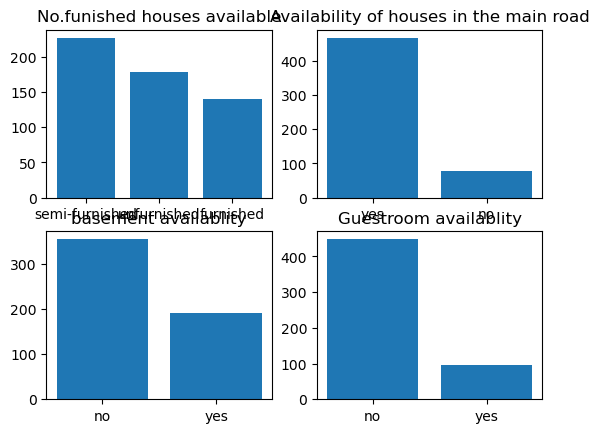

In [6]:
# BAR CHART
q3b1=house['mainroad'].value_counts()
q3b2=house['basement'].value_counts()
q3b3=house['guestroom'].value_counts()
fig,a =  plt.subplots(2,2)
a[0][0].bar(q3a.index,q3a.values)
a[0][0].set_title('No.funished houses available')
a[0][1].bar(q3b1.index,q3b1.values)
a[0][1].set_title('Availability of houses in the main road')
a[1][0].bar(q3b2.index,q3b2.values)
a[1][0].set_title('basement availablity')
a[1][1].bar(q3b3.index,q3b3.values)
a[1][1].set_title('Guestroom availablity')
plt.show()

### Bi-Variate Analysis

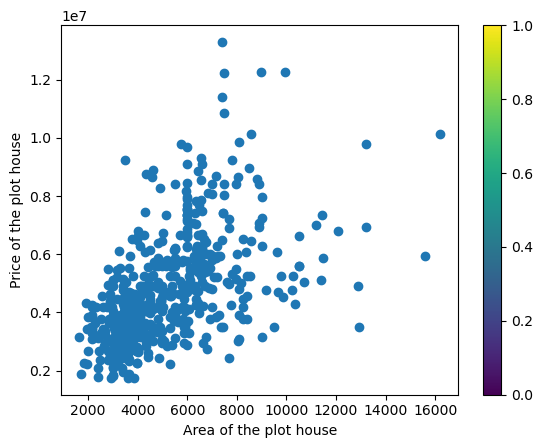

In [7]:
#Scatter plot
plt.scatter(house['area'], house['price'])
plt.xlabel('Area of the plot house')
plt.ylabel('Price of the plot house')
plt.colorbar()
plt.show()

### Multi-Variate Analysis

In [8]:
import seaborn as sns

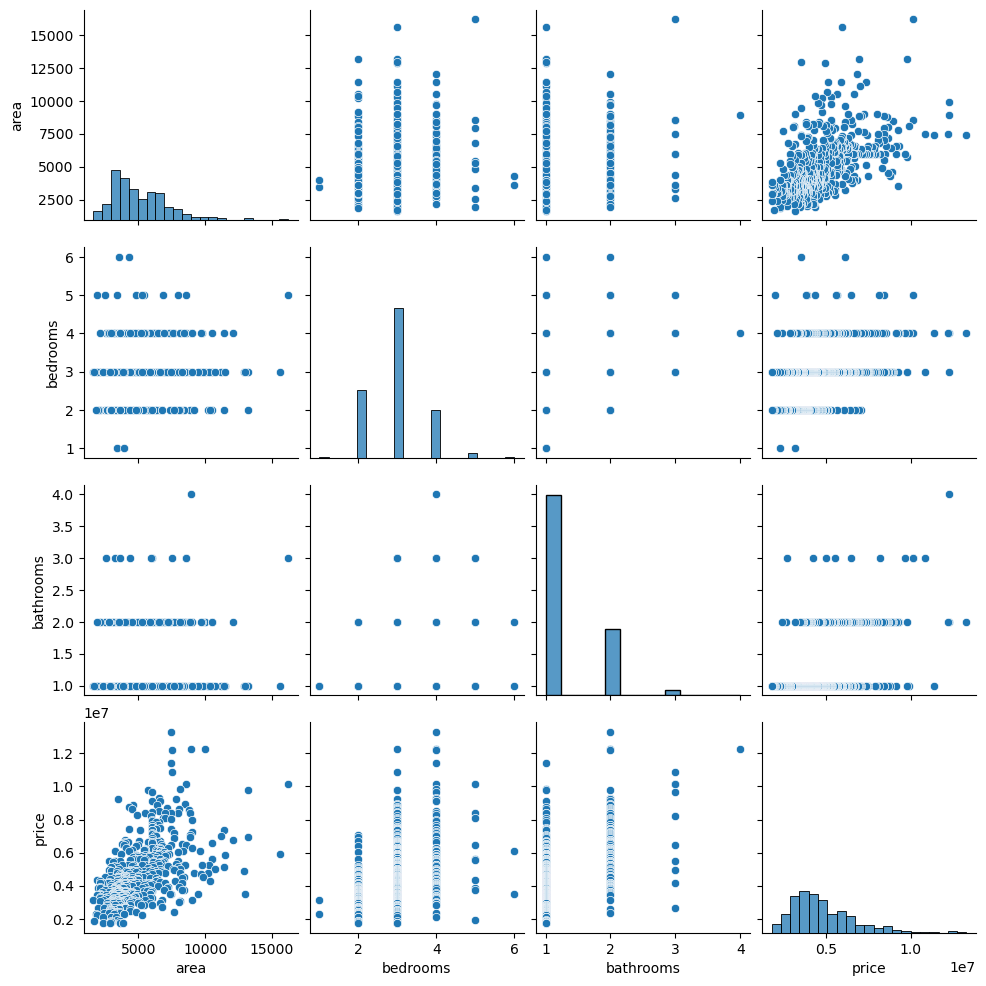

In [9]:
sns.pairplot(house[['area', 'bedrooms', 'bathrooms','price']])

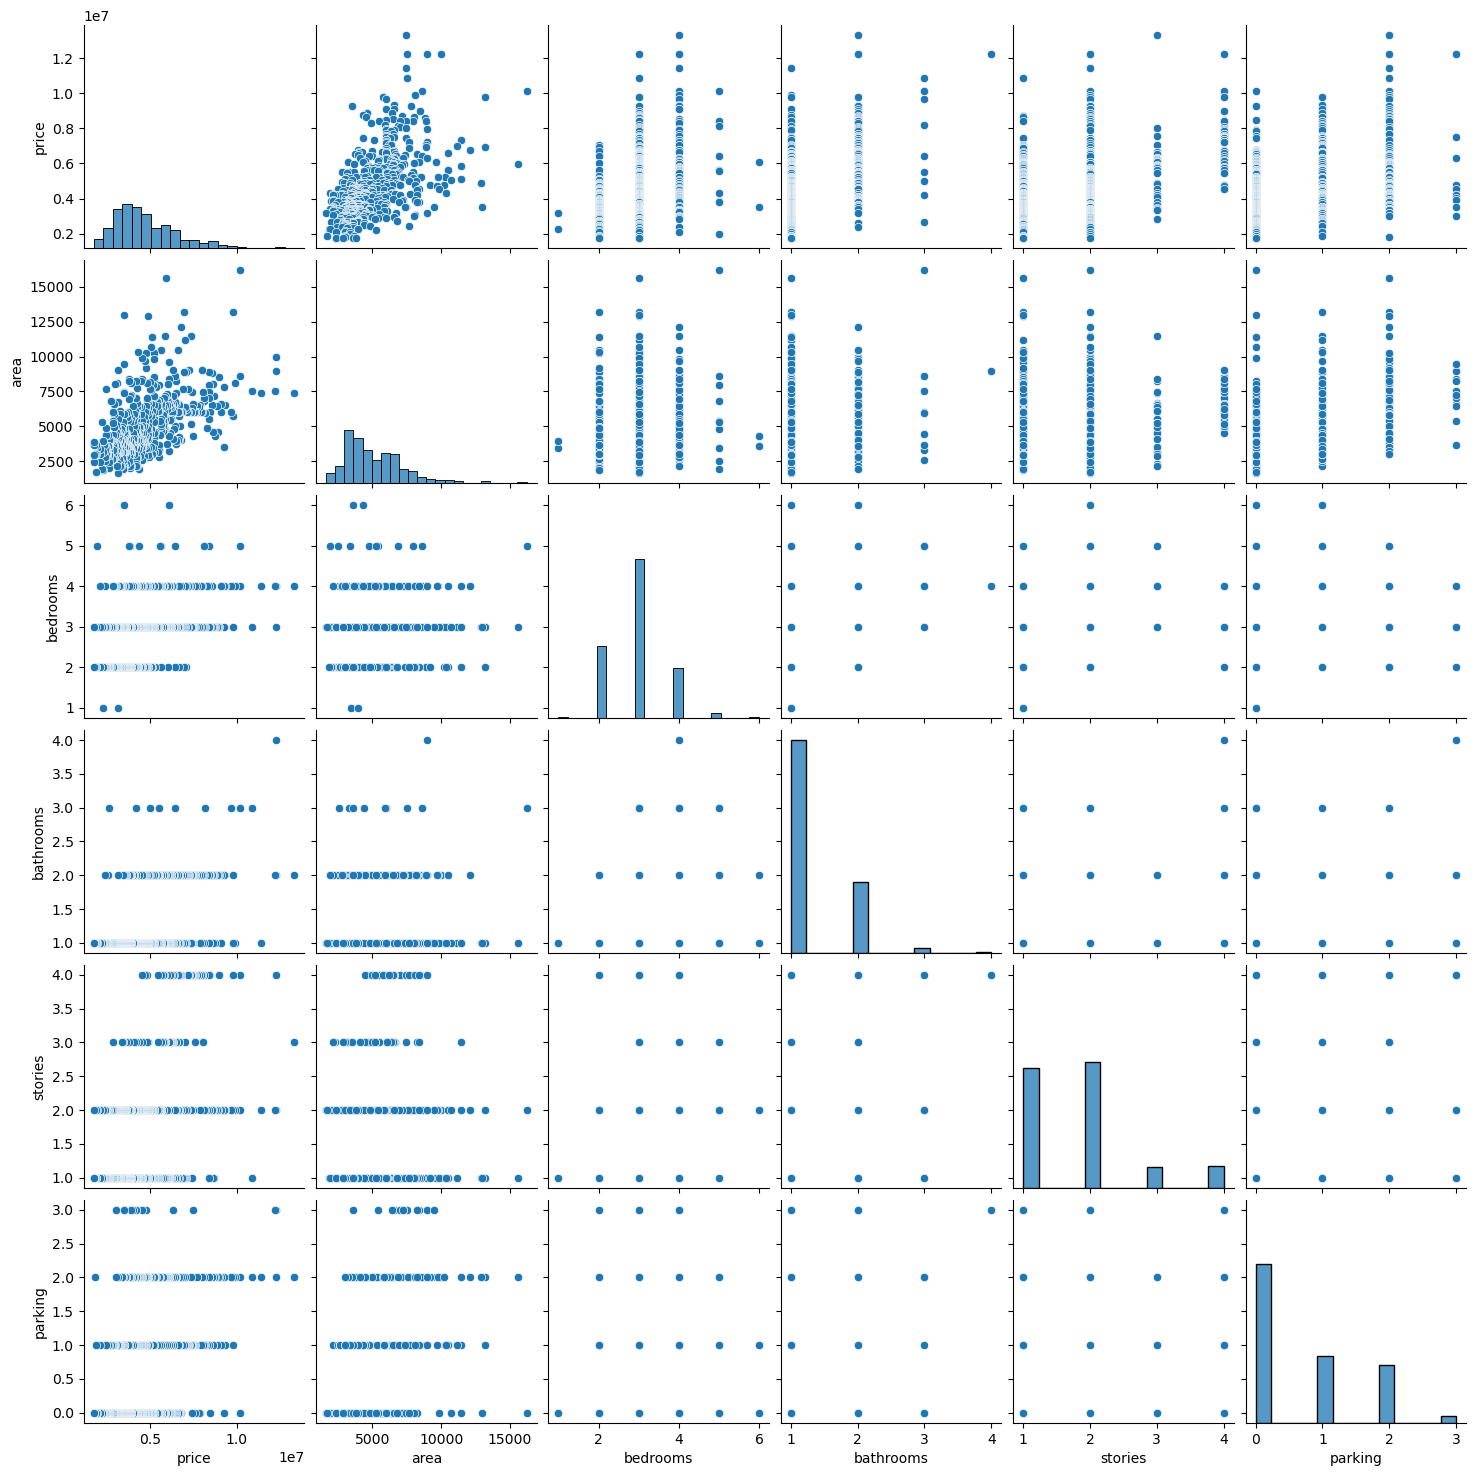

In [10]:
sns.pairplot(house)

C:\Users\prasa\AppData\Local\Temp\ipykernel_15688\283143464.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=house.corr()


Text(0.5, 1.0, 'Correlation between features')

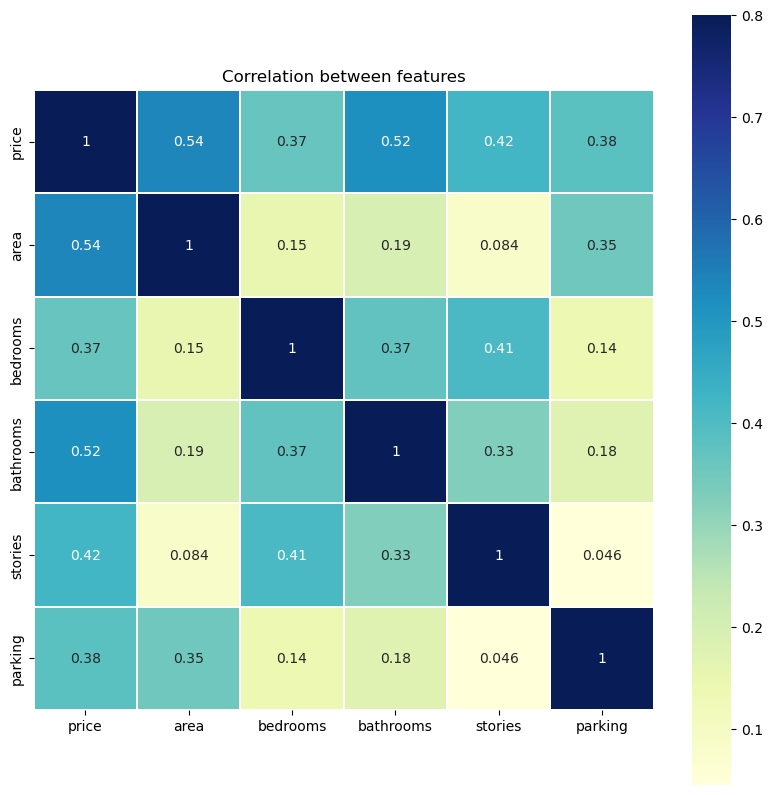

In [11]:
# heat plot
corr=house.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
 square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features')

## 4. Perform descriptive statistics on the dataset.

In [12]:
house.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Finding correlation between area and price 

In [13]:
house[['area','price']].corr()

,area,price
area,1.000000,0.535997
price,0.535997,1.000000


## Finding correlation between bedrooms bathrooms stories price 

In [14]:
print(house[['price', 'bedrooms','bathrooms','stories','parking']].corr())

              price  bedrooms  bathrooms   stories   parking
price      1.000000  0.366494   0.517545  0.420712  0.384394
bedrooms   0.366494  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.139270   0.177496  0.045547  1.000000


## 5. Check for Missing values and deal with them.

In [15]:
house.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [16]:
print(house.interpolate(inplace=True))

None


## 6. Find the outliers and replace them outliers

<Axes: >

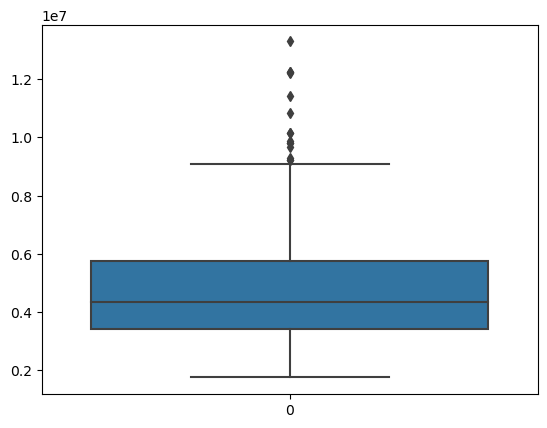

In [17]:
sns.boxplot(house['price'])

<Axes: >

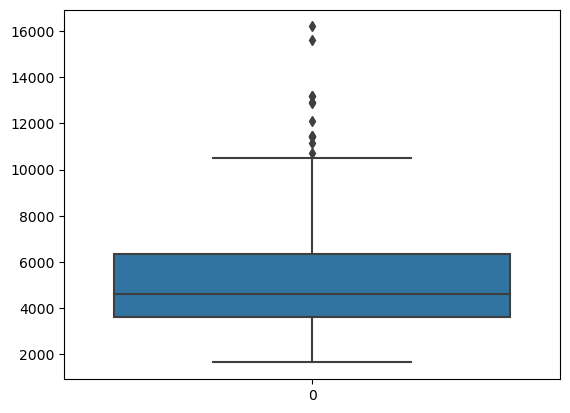

In [18]:
sns.boxplot(house['area'])

In [19]:
# Fixing outliers on the price column
Q1 = house['price'].quantile(0.25)
Q3 = house['price'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Fare_outliers = house[(house['price'] < Q1 - whisker_width*IQR) | (house['price'] > Q3 - whisker_width*IQR)]
Fare_outliers.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [20]:
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
house['price']=np.where(house['price']>upper_whisker,upper_whisker,np.where(house['price']<lower_whisker,lower_whisker,house['price']))

<Axes: >

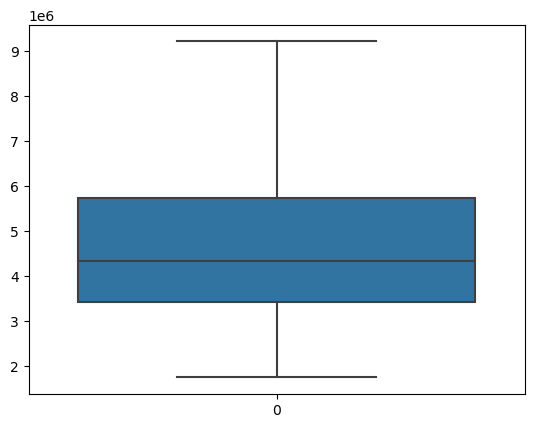

In [21]:
sns.boxplot(house['price'])

In [22]:
# Fixing outliers on the price column
Q1 = house['area'].quantile(0.25)
Q3 = house['area'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Fare_outliers = house[(house['area'] < Q1 - whisker_width*IQR) | (house['area'] > Q3 - whisker_width*IQR)]
Fare_outliers.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,9205000.0,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,9205000.0,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,9205000.0,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,9205000.0,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,9205000.0,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [23]:
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
house['area']=np.where(house['area']>upper_whisker,upper_whisker,np.where(house['area']<lower_whisker,lower_whisker,house['area']))

<Axes: >

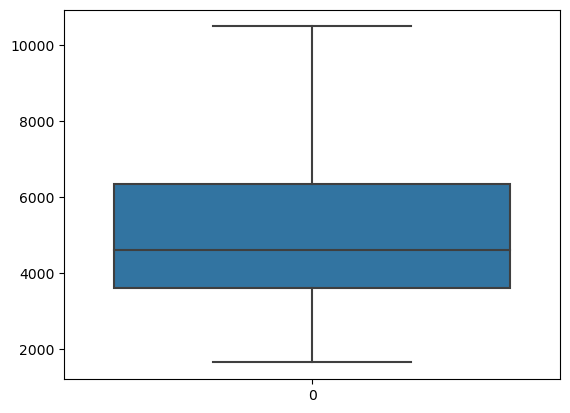

In [24]:
sns.boxplot(house['area'])

## 7. Check for Categorical columns and perform encoding.

In [25]:
cat_features=[i for i in house.columns if house.dtypes[i]=='object']

In [26]:
## one-hot encoding
house = pd.get_dummies(house, columns=cat_features, drop_first=True)

In [27]:
house

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,9205000.0,7420.0,4,2,3,2,1,0,0,0,1,0,0
1,9205000.0,8960.0,4,4,4,3,1,0,0,0,1,0,0
2,9205000.0,9960.0,3,2,2,2,1,0,1,0,0,1,0
3,9205000.0,7500.0,4,2,2,3,1,0,1,0,1,0,0
4,9205000.0,7420.0,4,1,2,2,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000.0,2,1,1,2,1,0,1,0,0,0,1
541,1767150.0,2400.0,3,1,1,0,0,0,0,0,0,1,0
542,1750000.0,3620.0,2,1,1,0,1,0,0,0,0,0,1
543,1750000.0,2910.0,3,1,1,0,0,0,0,0,0,0,0


## 8. Split the data into dependent and independent variables. 

In [28]:
# Dependent variable
y = house['price']

# Independent variables
X = house[['area', 'bedrooms', 'bathrooms','stories','mainroad_yes','guestroom_yes','basement_yes','parking']]

In [29]:
y

0      9205000.0
1      9205000.0
2      9205000.0
3      9205000.0
4      9205000.0
         ...    
540    1820000.0
541    1767150.0
542    1750000.0
543    1750000.0
544    1750000.0
Name: price, Length: 545, dtype: float64

In [30]:
X

,area,bedrooms,bathrooms,stories,mainroad_yes,guestroom_yes,basement_yes,parking
0,7420.0,4,2,3,1,0,0,2
1,8960.0,4,4,4,1,0,0,3
2,9960.0,3,2,2,1,0,1,2
3,7500.0,4,2,2,1,0,1,3
4,7420.0,4,1,2,1,1,1,2
...,...,...,...,...,...,...,...,...
540,3000.0,2,1,1,1,0,1,2
541,2400.0,3,1,1,0,0,0,0
542,3620.0,2,1,1,1,0,0,0
543,2910.0,3,1,1,0,0,0,0


## 9. Scale the independent variables

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the independent variables
X_scaled = scaler.fit_transform(X)

In [33]:
X_scaled

array([[ 1.15658327,  1.40341936,  1.42181174, ..., -0.46531479,
        -0.73453933,  1.51769249],
       [ 1.92506041,  1.40341936,  5.40580863, ..., -0.46531479,
        -0.73453933,  2.67940935],
       [ 2.42407154,  0.04727831,  1.42181174, ..., -0.46531479,
         1.3613975 ,  1.51769249],
       ...,
       [-0.73965902, -1.30886273, -0.57018671, ..., -0.46531479,
        -0.73453933, -0.80574124],
       [-1.09395692,  0.04727831, -0.57018671, ..., -0.46531479,
        -0.73453933, -0.80574124],
       [-0.62488646,  0.04727831, -0.57018671, ..., -0.46531479,
        -0.73453933, -0.80574124]])

## 10. Split the data into training and testing

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [36]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (436, 8)
Shape of X_test: (109, 8)
Shape of y_train: (436,)
Shape of y_test: (109,)


## 11. Build the Model

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
# Initialize the linear regression model
model = LinearRegression()

## 12. Train the Model

In [39]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

## 13. Test the Model

In [40]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

## 14. Measure the performance using Metrics

In [41]:
# mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse 

1660592715275.1707

In [42]:
# r2_score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.5889511982359401

In [43]:
#adjusted r2 score
n = X.shape[0]  # number of samples
p = X.shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adjusted_r2

0.5828161414931929

In [44]:
#root mean squared error

In [45]:
import math
rmse=math.sqrt(mse)
rmse

1288639.870279967